MID-TERM PROJECT: Heart Disease prediction using "Bernoulli's naive Bayes" classifier

In [ ]:
#importing the libraries for the project
import numpy as np # numpy is used for linear algebra
import pandas as pd # pandas is used for data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # matplotlib is used for data visualization
import seaborn as sns # seaborn is used for data visualization

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [6]:
#importing the libraries for the model designing using sklearn.
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [7]:
# loading the data
df = pd.read_csv("/Users/dheerajavadhutha/Downloads/heart.csv")

In [9]:
df.head() #loading the first five rows of the data using head function

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.describe() #describe function helps in analysing the dataset i.e mean,min,std,varaiance.


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.columns #using columns function it gives the columns in the dataset.

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [12]:
df["age"].mean() # finding the mean of the age column using the mean function

54.366336633663366

In [13]:
#missing value
df.isnull().sum() #isnull and sum function helps in finding the any error or missing data in the data set.

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

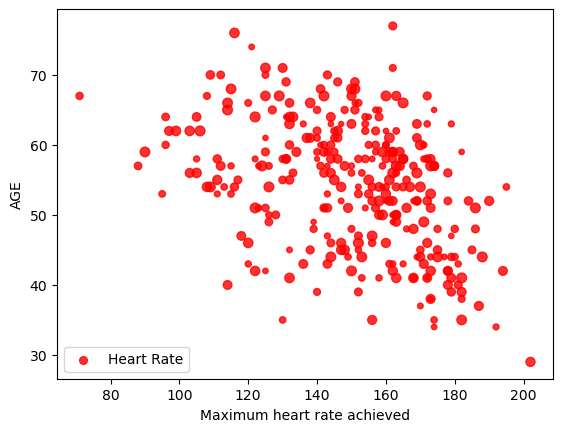

In [14]:
# Fixing random state for reproducibility
np.random.seed(19680801)


x = df['thalachh']
y = df['age']
s = np.random.rand(*x.shape) * 150 + 50

plt.scatter(x, y, s, c="r", alpha=0.8, marker=r'.',
            label="Heart Rate")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("AGE")
plt.legend(loc='lower left')
plt.show()

<Figure size 2000x1500 with 0 Axes>

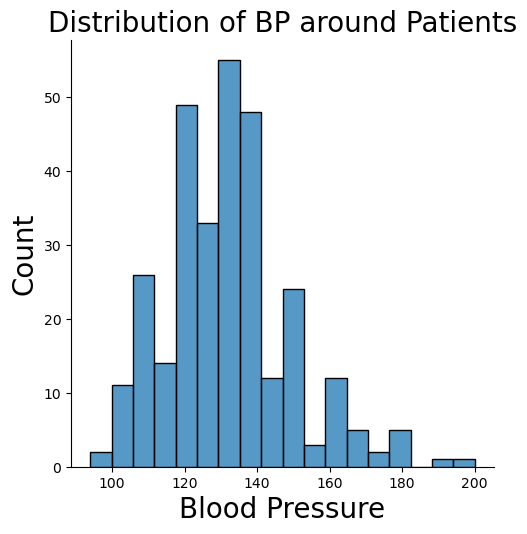

In [15]:
plt.figure(figsize=(20,15))
sns.displot(df["trtbps"])
plt.title("Distribution of BP around Patients", fontsize=20)
plt.xlabel("Blood Pressure", fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

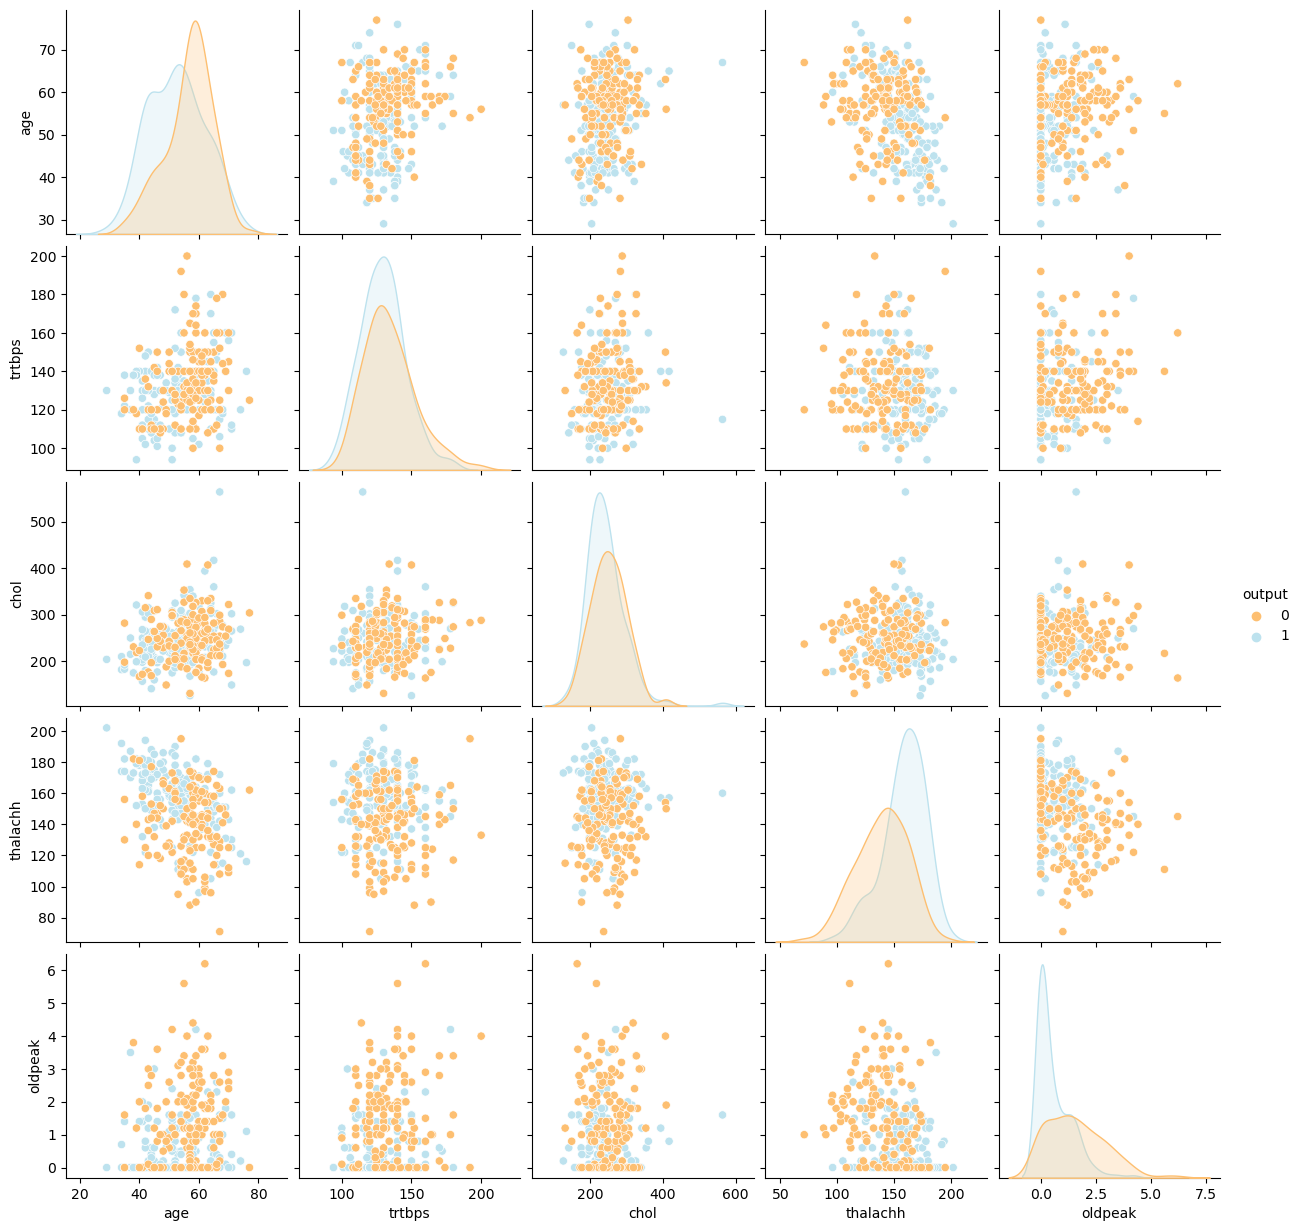

In [16]:
x_vars=['age','trtbps','chol','thalachh','oldpeak'] #considering the x_vars for the given columns
y_vars=['age','trtbps','chol','thalachh','oldpeak'] #cosndiering the y_vars for the given columns

sns.pairplot(data=df,x_vars=x_vars,y_vars=y_vars,hue='output',palette='RdYlBu')

In [17]:
x=df.iloc[:, 1:-1].values #x repersent the test data of the dataset in the location of index last to first.

y=df.iloc[:, -1].values   #y represent the target value of the dataset.
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

In [18]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [19]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [20]:
x_train, x_test

(array([[-1.43641607,  0.98584243, -0.57412513, ..., -0.66169316,
         -0.70710678, -0.46472917],
        [-1.43641607,  0.98584243,  0.83106608, ..., -0.66169316,
          0.26516504, -0.46472917],
        [ 0.69617712,  0.98584243,  0.47976828, ...,  0.95577901,
         -0.70710678, -0.46472917],
        ...,
        [ 0.69617712,  1.94013791, -0.69122439, ..., -0.66169316,
         -0.70710678,  1.14190596],
        [ 0.69617712,  0.98584243,  0.36266901, ...,  0.95577901,
         -0.70710678, -0.46472917],
        [ 0.69617712,  0.03154696, -0.69122439, ..., -0.66169316,
         -0.70710678, -0.46472917]]),
 array([[ 6.21581561e-01, -1.01006076e+00,  7.38067738e-01,
         -1.57231830e+00, -4.16025147e-01,  8.91132789e-01,
         -1.09707537e+00,  1.54560308e+00,  1.62748286e+00,
         -2.26232796e+00, -7.45049451e-01,  1.06436231e+00],
        [ 6.21581561e-01,  2.12283957e+00,  2.04685065e+00,
         -3.86846038e-01, -4.16025147e-01, -1.12216722e+00,
          2.

In [21]:
y_train,y_test

(array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0]),
 array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1

In [23]:
#To compare the shape of testing and training sets, use the following piece of code:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (242, 12)
Shape of testing feature: (61, 12)
Shape of training label: (242,)
Shape of training label: (61,)


In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gaussian = GaussianNB()

In [27]:
gaussian.fit(x_train, y_train) #training the model

GaussianNB()

In [28]:
Y_pred = gaussian.predict(x_test) #testing

In [29]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score

In [30]:
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')

print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)

Confusion matrix for Naive Bayes
 [[21  6]
 [ 5 29]]
accuracy: 0.820
precision_Naive Bayes: 0.820
recall_Naive Bayes: 0.820
